# Exploring the policy dataset and Gathering data on State Policy Changes

The policy data is we have is extremely extensive. In this notebook, the main aim is to reduce the data and extract important information from the data to be used on ahead. 



In [1]:
import pandas as pd
from random import randrange
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [18, 10]
import math




In [2]:
# # # Policy Data Download to dataset folder
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2021.csv > ../dataset/data_policy_2021.csv
# !curl -l https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_withnotes_2020.csv > ../dataset/data_policy_2020.csv

In [3]:
# Read 
df = pd.read_csv('../dataset/data_policy_2021.csv',parse_dates=['Date'])

# Only USA 
df = df[df['CountryCode']=='USA']

# Reset index for convenience
df.reset_index(drop=True)



/usr/local/Caskroom/miniconda/base/envs/602/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,3,8,11,14,17,20,23,26,35,37,46,48,59) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C1_Notes,C2_Workplace closing,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,United States,USA,NaN,NaN,NAT_TOTAL,2021-01-01,3.0,0.0,NaN,2.0,...,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
1,United States,USA,NaN,NaN,NAT_TOTAL,2021-01-02,3.0,0.0,NaN,2.0,...,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
2,United States,USA,NaN,NaN,NAT_TOTAL,2021-01-03,3.0,0.0,NaN,2.0,...,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
3,United States,USA,NaN,NaN,NAT_TOTAL,2021-01-04,3.0,0.0,NaN,2.0,...,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
4,United States,USA,NaN,NaN,NAT_TOTAL,2021-01-05,3.0,0.0,NaN,2.0,...,71.76,71.76,73.33,73.33,68.44,68.44,69.29,69.29,62.5,62.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17363,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-11-26,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17364,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-11-27,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17365,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-11-28,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17366,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-11-29,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
states = df['RegionName'].dropna().unique()

------------------------------------------------

# 1. State Specific Policy Exploration

First we explore policies for individual states before generalizing 


## 1.1 Exploring all the columns present and picking the columns needed columns 
From the big policy dataset, we pick the columns we feel are necessary to create a good model save them 

In [5]:
for i,j in enumerate(df.columns):
    print(i,j,end='\t')

0 CountryName	1 CountryCode	2 RegionName	3 RegionCode	4 Jurisdiction	5 Date	6 C1_School closing	7 C1_Flag	8 C1_Notes	9 C2_Workplace closing	10 C2_Flag	11 C2_Notes	12 C3_Cancel public events	13 C3_Flag	14 C3_Notes	15 C4_Restrictions on gatherings	16 C4_Flag	17 C4_Notes	18 C5_Close public transport	19 C5_Flag	20 C5_Notes	21 C6_Stay at home requirements	22 C6_Flag	23 C6_Notes	24 C7_Restrictions on internal movement	25 C7_Flag	26 C7_Notes	27 C8_International travel controls	28 C8_Notes	29 E1_Income support	30 E1_Flag	31 E1_Notes	32 E2_Debt/contract relief	33 E2_Notes	34 E3_Fiscal measures	35 E3_Notes	36 E4_International support	37 E4_Notes	38 H1_Public information campaigns	39 H1_Flag	40 H1_Notes	41 H2_Testing policy	42 H2_Notes	43 H3_Contact tracing	44 H3_Notes	45 H4_Emergency investment in healthcare	46 H4_Notes	47 H5_Investment in vaccines	48 H5_Notes	49 H6_Facial Coverings	50 H6_Flag	51 H6_Notes	52 H7_Vaccination policy	53 H7_Flag	54 H7_Notes	55 H8_Protection of elderly people	56 H8_Fl

In [6]:
# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]


In [7]:
STATE_PICK = states[randrange(len(states))]
print(f'State Picked : {STATE_PICK}')

State Picked : Hawaii


In [8]:
# Selecting only the required state 
target_df = df[df['RegionName']==STATE_PICK]

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date']]

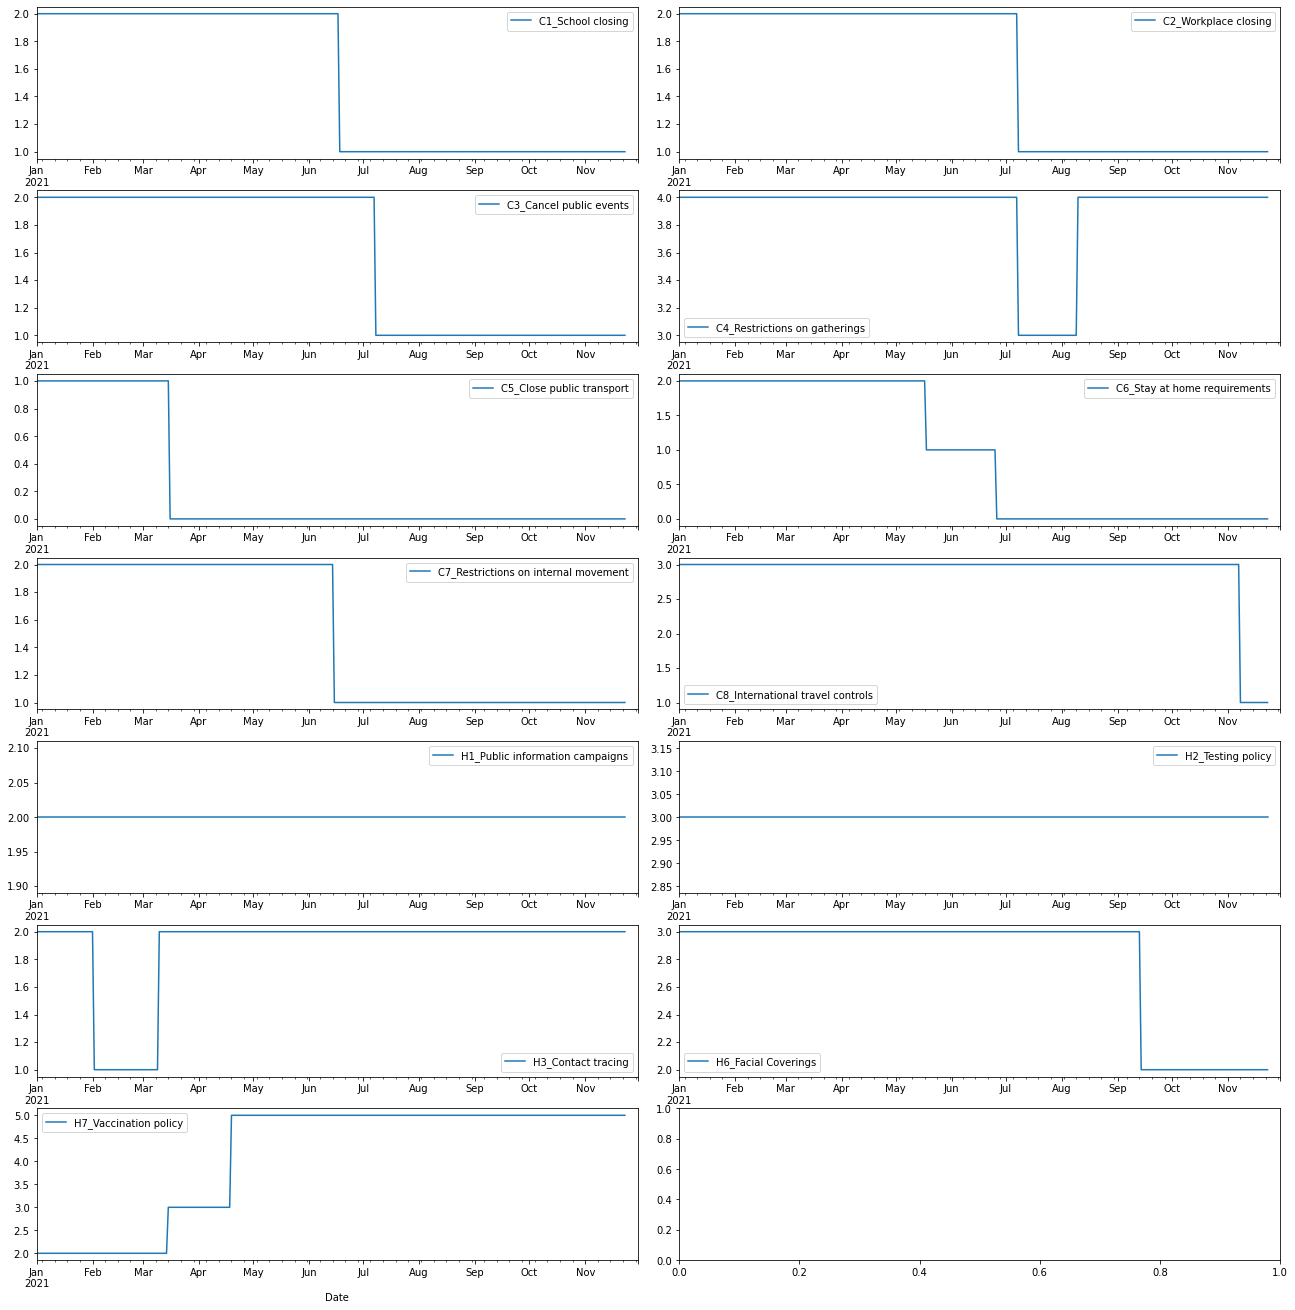

In [9]:
# Displying all columns for good measure 

plt.rcParams['figure.figsize'] = [18, 18]

display_size = len(GOOD_COLUMNS) if len(GOOD_COLUMNS)%2==0 else len(GOOD_COLUMNS) + 1
fig, axes = plt.subplots(nrows=int(display_size/2), ncols=2)

fig.tight_layout()
row_count = 0 
column_count = 0 

for index,column_pick in enumerate(GOOD_COLUMNS):
    target_df.plot(y=column_pick,x='Date' ,ax=axes[row_count,column_count])
    
    column_count = 1 if column_count==0 else 0
    
    if column_count ==0:
        row_count = row_count + 1

## 1.2 Adding Change 
For each of the above plots, we see that we can calculate the date at which the changes occur, we refer to these points in time as __STATE_POLICY_CHANGES__. <br/>

Below we run the operation for extracting the state policy changes from the dataset as separate columns

> also we drop the __Fiscal Measures__ column as it is not very useful for the state. 

In [10]:
OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
    print('\n')
    # isolating the column in question 
    df_process = target_df[[column_pick,'Date']]
    
    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();
    
    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()
    print(f'Unique Values in column {column_pick}: {change_values}')
    
    # Cleaning Values : Removing 0 and nan 
    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)
            
    print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')
    
    
    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        output_row = {}
        date_implement = target_df.loc[elemnts]['Date'].values[0]
        policy = column_pick
        metric_change = unique_change_value_iterator
        output_row['date_implement'] = date_implement
        output_row['policy'] = policy
        output_row['metric_change'] = metric_change
        output_row['state'] = STATE_PICK
        
        
        OUTPUT_DATABASE.append(output_row)
        

        
    



Unique Values in column C1_School closing: [nan, 0.0, -1.0]
Unique Cleaned Values in column C1_School closing: [-1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [-1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [-1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [-1.0, 1.0]


Unique Values in column C5_Close public transport: [nan, 0.0, -1.0]
Unique Cleaned Values in column C5_Close public transport: [-1.0]


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [-1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, -1.0]
Unique Cleaned Values in column C7_Restrictions on internal movement: [-1.0]


Unique Values in column C8_Int

In [11]:
STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
STATE_POLICY_CHANGE

,date_implement,policy,metric_change,state
0,2021-06-18,C1_School closing,-1.0,Hawaii
1,2021-07-08,C2_Workplace closing,-1.0,Hawaii
2,2021-07-08,C3_Cancel public events,-1.0,Hawaii
3,2021-07-08,C4_Restrictions on gatherings,-1.0,Hawaii
4,2021-08-10,C4_Restrictions on gatherings,1.0,Hawaii
5,2021-03-16,C5_Close public transport,-1.0,Hawaii
6,2021-05-18,C6_Stay at home requirements,-1.0,Hawaii
7,2021-06-15,C7_Restrictions on internal movement,-1.0,Hawaii
8,2021-11-08,C8_International travel controls,-2.0,Hawaii
9,2021-02-02,H3_Contact tracing,-1.0,Hawaii


-------------------------

# 2. IMPLEMENTING FOR ALL STATES TO GET `STATE_POLICY_CHANGE` DATASET

In [12]:
# The main output variable ------------------------
STATE_POLICY_CHANGE_EXPORT = [] 

# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]



for STATE_PICK in states[:30]: 
    
    print(f'Working on State : {STATE_PICK}')
    
    # Selecting only the required state 
    target_df = df[df['RegionName']==STATE_PICK]

    # Sorting by date
    target_df = target_df.sort_values(by='Date')

    # Removing all the colmuns except GOODCOLUMNS and Date 
    target_df = target_df[GOOD_COLUMNS + ['Date']]
    
    OUTPUT_DATABASE = []

    for index,column_pick in enumerate(GOOD_COLUMNS):
        print('\n')
        # isolating the column in question 
        df_process = target_df[[column_pick,'Date']]

        # Finding change and saving them as a diff column
        target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

        # Finding unique values in the diff column
        change_values = target_df[f'{column_pick}_diff'].unique().tolist()
        print(f'Unique Values in column {column_pick}: {change_values}')

        # Cleaning Values : Removing 0 and nan 
        change_values_cleaned = []
        for i in change_values:
            if i and not math.isnan(i):
                change_values_cleaned.append(i)

        print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')


        for unique_change_value_iterator in change_values_cleaned:
            # Getting the index of change 
            elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()

            # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
            for each_instance_of_elem in elemnts:
                output_row = {}
                date_implement = target_df.loc[[each_instance_of_elem]]['Date'].values[0]
                metric_value = target_df.loc[[each_instance_of_elem]][column_pick].values[0]
                policy = column_pick
                metric_change = unique_change_value_iterator
                output_row['date_implement'] = date_implement
                output_row['policy'] = policy
                output_row['metric_change'] = metric_change
                output_row['metric_value'] = metric_value
                output_row['state'] = STATE_PICK


                OUTPUT_DATABASE.append(output_row)
        
    STATE_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)
    STATE_POLICY_CHANGE_EXPORT.append(STATE_POLICY_CHANGE)
        
    


Working on State : Alaska


Unique Values in column C1_School closing: [nan, 0.0, -1.0]
Unique Cleaned Values in column C1_School closing: [-1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C2_Workplace closing: [-1.0, 1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [-1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, -1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [-1.0]


Unique Values in column C5_Close public transport: [nan, 0.0]
Unique Cleaned Values in column C5_Close public transport: []


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [-1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, -1.0]
Unique Cleaned Values in column C7_Restrictions on internal movement: [-1.0]


Unique Values 

Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, 1.0, -2.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [1.0, -2.0]


Unique Values in column C5_Close public transport: [nan, 0.0]
Unique Cleaned Values in column C5_Close public transport: []


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [-1.0]


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0, -1.0]
Unique Cleaned Values in column C7_Restrictions on internal movement: [-1.0]


Unique Values in column C8_International travel controls: [nan, 0.0, -2.0]
Unique Cleaned Values in column C8_International travel controls: [-2.0]


Unique Values in column H1_Public information campaigns: [nan, 0.0]
Unique Cleaned Values in column H1_Public information campaigns: []


Unique Values in column H2_Testing policy: [nan, 0.0]
Unique Cleaned Values in column H2_Testing policy: []


Unique Values in colum

Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0, 2.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0, 2.0]
Working on State : Iowa


Unique Values in column C1_School closing: [nan, 0.0, 1.0, -1.0, 2.0]
Unique Cleaned Values in column C1_School closing: [1.0, -1.0, 2.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0]
Unique Cleaned Values in column C2_Workplace closing: [-1.0]


Unique Values in column C3_Cancel public events: [nan, 0.0, -1.0]
Unique Cleaned Values in column C3_Cancel public events: [-1.0]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: []


Unique Values in column C5_Close public transport: [nan, 0.0]
Unique Cleaned Values in column C5_Close public transport: []


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned Values in column C6_Stay at home requirements: [-1.0]


Unique Values in column C7_Restrictions 

Unique Values in column C8_International travel controls: [nan, 0.0, -1.0]
Unique Cleaned Values in column C8_International travel controls: [-1.0]


Unique Values in column H1_Public information campaigns: [nan, 0.0]
Unique Cleaned Values in column H1_Public information campaigns: []


Unique Values in column H2_Testing policy: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column H2_Testing policy: [-1.0, 1.0]


Unique Values in column H3_Contact tracing: [nan, 0.0]
Unique Cleaned Values in column H3_Contact tracing: []


Unique Values in column H6_Facial Coverings: [nan, 0.0, -1.0]
Unique Cleaned Values in column H6_Facial Coverings: [-1.0]


Unique Values in column H7_Vaccination policy: [nan, 0.0, 1.0, 2.0]
Unique Cleaned Values in column H7_Vaccination policy: [1.0, 2.0]
Working on State : Louisiana


Unique Values in column C1_School closing: [nan, 0.0, -1.0]
Unique Cleaned Values in column C1_School closing: [-1.0]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0


Unique Values in column C7_Restrictions on internal movement: [nan, 0.0]
Unique Cleaned Values in column C7_Restrictions on internal movement: []


Unique Values in column C8_International travel controls: [nan, 0.0, -2.0]
Unique Cleaned Values in column C8_International travel controls: [-2.0]


Unique Values in column H1_Public information campaigns: [nan, 0.0]
Unique Cleaned Values in column H1_Public information campaigns: []


Unique Values in column H2_Testing policy: [nan, 0.0]
Unique Cleaned Values in column H2_Testing policy: []


Unique Values in column H3_Contact tracing: [nan, 0.0, -1.0]
Unique Cleaned Values in column H3_Contact tracing: [-1.0]


Unique Values in column H6_Facial Coverings: [nan, 0.0, -1.0]
Unique Cleaned Values in column H6_Facial Coverings: [-1.0]


Unique Values in column H7_Vaccination policy: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column H7_Vaccination policy: [-1.0, 1.0]
Working on State : Mississippi


Unique Values in column C1_School clos

In [13]:
STATE_POLICY_CHANGE_EXPORT_DF = pd.concat(STATE_POLICY_CHANGE_EXPORT)

In [14]:

STATE_POLICY_CHANGE_EXPORT_DF

,date_implement,policy,metric_change,metric_value,state
0,2021-01-19,C1_School closing,-1.0,2.0,Alaska
1,2021-03-15,C1_School closing,-1.0,1.0,Alaska
2,2021-07-10,C2_Workplace closing,-1.0,0.0,Alaska
3,2021-08-05,C2_Workplace closing,1.0,1.0,Alaska
4,2021-03-08,C3_Cancel public events,-1.0,1.0,Alaska
...,...,...,...,...,...
8,2021-07-18,H2_Testing policy,-1.0,2.0,Nebraska
9,2021-07-19,H2_Testing policy,1.0,3.0,Nebraska
10,2021-01-13,H7_Vaccination policy,2.0,3.0,Nebraska
11,2021-03-29,H7_Vaccination policy,1.0,4.0,Nebraska


In [15]:
# Creating the output csv 
# STATE_POLICY_CHANGE_EXPORT_DF.to_csv('../outputs/processed_2021_statePolChange.csv')

----------------

# Country wide policies 

In [16]:
# This varaible holds important columns
GOOD_COLUMNS = [df.columns[6] ,df.columns[9],df.columns[12],df.columns[15],df.columns[18]
               ,df.columns[21],df.columns[24],df.columns[27],df.columns[38],df.columns[41]
               ,df.columns[43],df.columns[49],df.columns[52]]

In [17]:
# Selecting only the required state 
target_df = df[df['Jurisdiction']=='NAT_TOTAL']

# Sorting by date
target_df = target_df.sort_values(by='Date')

# Removing all the colmuns except GOODCOLUMNS and Date 
target_df = target_df[GOOD_COLUMNS + ['Date']]

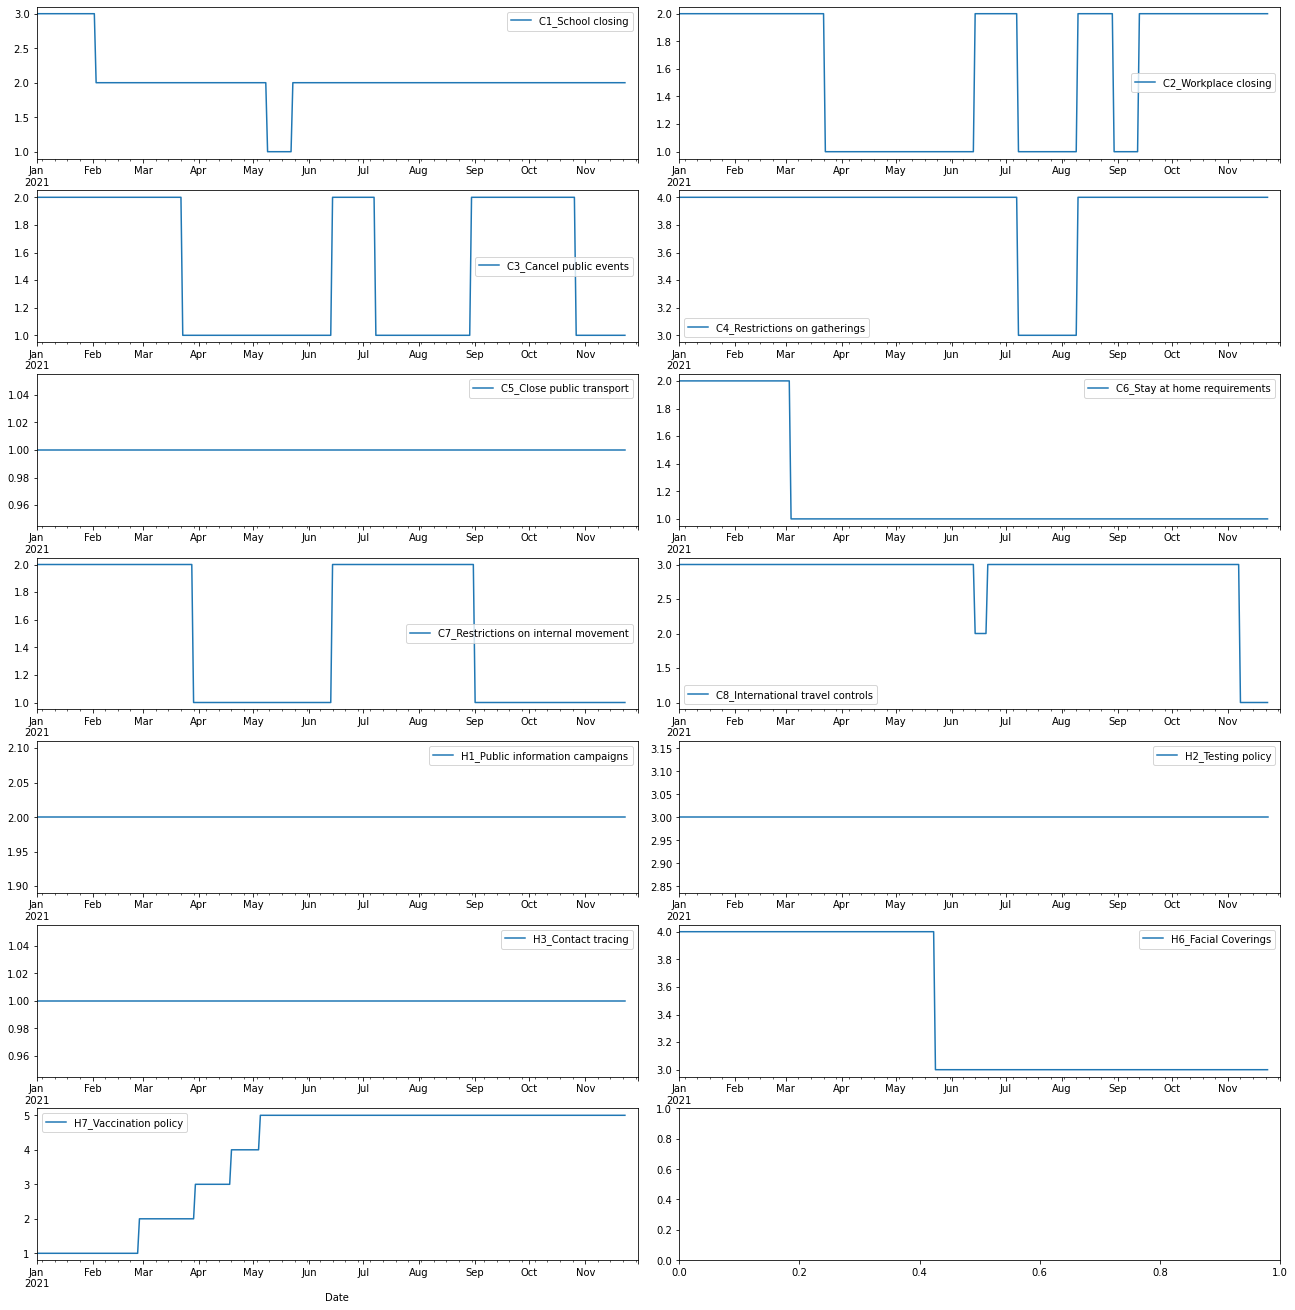

In [18]:
# Displying all columns for good measure 

plt.rcParams['figure.figsize'] = [18, 18]

display_size = len(GOOD_COLUMNS) if len(GOOD_COLUMNS)%2==0 else len(GOOD_COLUMNS) + 1
fig, axes = plt.subplots(nrows=int(display_size/2), ncols=2)

fig.tight_layout()
row_count = 0 
column_count = 0 

for index,column_pick in enumerate(GOOD_COLUMNS):
    target_df.plot(y=column_pick,x='Date' ,ax=axes[row_count,column_count])
    
    column_count = 1 if column_count==0 else 0
    
    if column_count ==0:
        row_count = row_count + 1

In [19]:
OUTPUT_DATABASE = []

for index,column_pick in enumerate(GOOD_COLUMNS):
    print('\n')
    # isolating the column in question 
    df_process = target_df[[column_pick,'Date']]

    # Finding change and saving them as a diff column
    target_df[f'{column_pick}_diff'] = df_process[column_pick].diff();

    # Finding unique values in the diff column
    change_values = target_df[f'{column_pick}_diff'].unique().tolist()
    print(f'Unique Values in column {column_pick}: {change_values}')

    # Cleaning Values : Removing 0 and nan 
    change_values_cleaned = []
    for i in change_values:
        if i and not math.isnan(i):
            change_values_cleaned.append(i)

    print(f'Unique Cleaned Values in column {column_pick}: {change_values_cleaned}')


    for unique_change_value_iterator in change_values_cleaned:
        # Getting the index of change 
        elemnts = target_df.index[target_df[f'{column_pick}_diff'] == unique_change_value_iterator].tolist()
        print(f'-----elemnts:{elemnts}')

        # GETTING THE POLICY CHANGE AS A DICTIONARY TERM 
        
        for each_instance_of_elem in elemnts:
            output_row = {}
            date_implement = target_df.loc[[each_instance_of_elem]]['Date'].values[0]
            metric_value = target_df.loc[[each_instance_of_elem]][column_pick].values[0]
            policy = column_pick
            metric_change = unique_change_value_iterator
            output_row['date_implement'] = date_implement
            output_row['policy'] = policy
            output_row['metric_change'] = metric_change
            output_row['metric_value'] = metric_value
            output_row['state'] = 'national'


            OUTPUT_DATABASE.append(output_row)

NAT_POLICY_CHANGE = pd.DataFrame(OUTPUT_DATABASE)


    





Unique Values in column C1_School closing: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C1_School closing: [-1.0, 1.0]
-----elemnts:[83867, 83962]
-----elemnts:[83976]


Unique Values in column C2_Workplace closing: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C2_Workplace closing: [-1.0, 1.0]
-----elemnts:[83915, 84022, 84075]
-----elemnts:[83998, 84055, 84089]


Unique Values in column C3_Cancel public events: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C3_Cancel public events: [-1.0, 1.0]
-----elemnts:[83915, 84022, 84133]
-----elemnts:[83998, 84075]


Unique Values in column C4_Restrictions on gatherings: [nan, 0.0, -1.0, 1.0]
Unique Cleaned Values in column C4_Restrictions on gatherings: [-1.0, 1.0]
-----elemnts:[84022]
-----elemnts:[84055]


Unique Values in column C5_Close public transport: [nan, 0.0]
Unique Cleaned Values in column C5_Close public transport: []


Unique Values in column C6_Stay at home requirements: [nan, 0.0, -1.0]
Unique Cleaned 

In [20]:
# NAT_POLICY_CHANGE.to_csv('../outputs/processed_2021_natPolChange.csv')

In [21]:
NAT_POLICY_CHANGE

,date_implement,policy,metric_change,metric_value,state
0,2021-02-03,C1_School closing,-1.0,2.0,national
1,2021-05-09,C1_School closing,-1.0,1.0,national
2,2021-05-23,C1_School closing,1.0,2.0,national
3,2021-03-23,C2_Workplace closing,-1.0,1.0,national
4,2021-07-08,C2_Workplace closing,-1.0,1.0,national
5,2021-08-30,C2_Workplace closing,-1.0,1.0,national
6,2021-06-14,C2_Workplace closing,1.0,2.0,national
7,2021-08-10,C2_Workplace closing,1.0,2.0,national
8,2021-09-13,C2_Workplace closing,1.0,2.0,national
9,2021-03-23,C3_Cancel public events,-1.0,1.0,national


# Fin